In [56]:
import numpy as np
import pandas as pd
from pathlib import Path

In [57]:
train_df = pd.read_csv(Path('Resources/2019loans.csv'))
test_df = pd.read_csv(Path('Resources/2020Q1loans.csv'))

In [58]:
# Convert categorical data to numeric and separate target feature for training data
train_df.head()
loan_dict = {'low_risk':0, 'high_risk':1}
train_df = train_df.replace({'loan_status':loan_dict})
loan_dict = {'low_risk':0, 'high_risk':1}
X_train = train_df.drop('loan_status', axis=1)
y_train = train_df['loan_status']
X_train = pd.get_dummies(X_train, drop_first=True)




In [59]:
X_train = X_train.drop('Unnamed: 0',axis=1)

In [60]:
columns = list(X_train.columns)


In [61]:
# Convert categorical data to numeric and separate target feature for testing data
test_df = test_df.replace({'loan_status':loan_dict})
X_test = test_df.drop('loan_status',axis=1)
y_test = test_df['loan_status']
X_test = pd.get_dummies(X_test,drop_first=True)
X_test = X_test.drop('Unnamed: 0',axis=1)

In [65]:
# add missing dummy variables to testing set
X_test = X_test.reindex(labels=columns,axis=1)
X_test = X_test.fillna(0)

In [66]:
y_test

0       0
1       0
2       0
3       0
4       0
       ..
4697    1
4698    1
4699    1
4700    1
4701    1
Name: loan_status, Length: 4702, dtype: int64

In [67]:
# Train the Logistic Regression model on the unscaled data and print the model score
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(max_iter=2000)
classifier
classifier.fit(X_train, y_train)
print(f"Training Data Score: {classifier.score(X_train, y_train)}")
print(f"Testing Data Score: {classifier.score(X_test, y_test)}")

Training Data Score: 0.7006568144499179
Testing Data Score: 0.5735857082092727


C:\Users\nnoar\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [68]:
# Train a Random Forest Classifier model and print the model score
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(random_state=1, n_estimators=500).fit(X_train, y_train)
print(f'Training Score: {clf.score(X_train, y_train)}')
print(f'Testing Score: {clf.score(X_test, y_test)}')


Training Score: 1.0
Testing Score: 0.6777966822628668


In [69]:
# Scale the data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler().fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [70]:
# Train the Logistic Regression model on the scaled data and print the model score
classifier = LogisticRegression(max_iter=2000)
classifier
classifier.fit(X_train_scaled, y_train)
print(f"Training Data Score: {classifier.score(X_train_scaled, y_train)}")
print(f"Testing Data Score: {classifier.score(X_test_scaled, y_test)}")


Training Data Score: 0.712807881773399
Testing Data Score: 0.719906422798809


In [71]:
# Train a Random Forest Classifier model on the scaled data and print the model score
clf = RandomForestClassifier(random_state=1, n_estimators=500).fit(X_train, y_train)
print(f'Training Score: {clf.score(X_train_scaled, y_train)}')
print(f'Testing Score: {clf.score(X_test_scaled, y_test)}')

Training Score: 0.5
Testing Score: 0.5


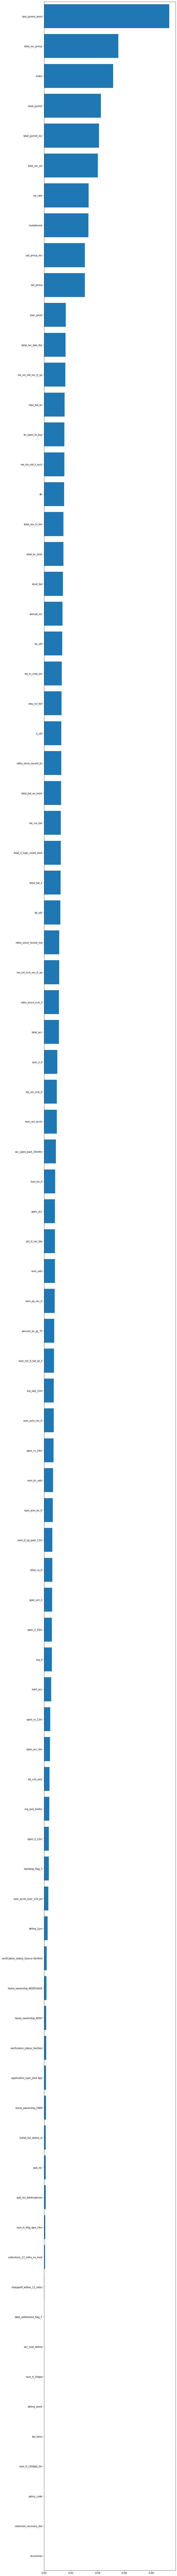

In [73]:
from matplotlib import pyplot as plt
feature_importances = clf.feature_importances_
features = sorted(zip(X_train.columns, clf.feature_importances_), key = lambda x: x[1])
cols = [f[0] for f in features]
width = [f[1] for f in features]

fig, ax = plt.subplots()

fig.set_size_inches(10,200)
plt.margins(y=0.001)

ax.barh(y=cols, width=width)

plt.show()



It appears the scaled data helped the logistic model make more accurate prediction while the random forest did no better than a coin flip. Looking at feature importance, this may be due to the fact that the random forest model is placing a lot of weight in last apyment amount, which seems counter intuitive.